# 1 - Installing dependencies

In [1]:
!pip install ultralytics gdown boto3 onnx onnxslim onnxruntime onnxruntime-gpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 7.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 262.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 191.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.9/142.9 kB 272.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 180.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.2/226.2 MB 201.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 195.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 194.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 204.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 191.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 193.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import ultralytics
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/opt/app-root/src/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
ultralytics.checks()

Ultralytics 8.3.44 🚀 Python-3.9.18 torch-2.5.1+cu124 CUDA:0 (NVIDIA L4, 22478MiB)
Setup complete ✅ (16 CPUs, 60.5 GB RAM, 62.5/99.4 GB disk)


In [4]:
!gdown 1W-OCfn_jxRo5asGpcE_sir81vc5oFQwI
!mv best.pt ../training/yolov8

Downloading...
From (original): https://drive.google.com/uc?id=1W-OCfn_jxRo5asGpcE_sir81vc5oFQwI
From (redirected): https://drive.google.com/uc?id=1W-OCfn_jxRo5asGpcE_sir81vc5oFQwI&confirm=t&uuid=7b1b2689-60f9-4a9b-8bb6-e3440ee782ad
To: /opt/app-root/src/demo-project/notebook/best.pt
100%|████████████████████████████████████████| 137M/137M [00:01<00:00, 69.5MB/s]


# 2 - Training

## 2.1 - Preparing dataset

In [ ]:
!curl -L "https://universe.roboflow.com/ds/wxHZbI81en?key=Oc2CkLD2NU" > roboflow.zip; unzip roboflow.zip -d ../datasets/wellcover/; rm roboflow.zip

In [5]:
!echo "" >> ../datasets/wellcover/data.yaml
!echo -n "path: /opt/app-root/src/demo-project/datasets/wellcover" >> ../datasets/wellcover/data.yaml

## 2.2 - Training

In [21]:
model = YOLO('yolov8x.pt')

In [ ]:
resultados = model.train(data='../datasets/wellcover/data.yaml', epochs=1000, name='yolov8s_navai', patience=700)

In [43]:
!yolo task=detect mode=predict model=runs/detect/yolov8s_navai/weights/best.pt source='../training/images/rua-zerada.jpg' save=true

Ultralytics 8.3.39 🚀 Python-3.9.18 torch-2.5.1+cu124 CUDA:0 (NVIDIA L4, 22478MiB)
Model summary (fused): 268 layers, 68,124,531 parameters, 0 gradients, 257.4 GFLOPs

image 1/1 /opt/app-root/src/demo-project/notebook/../training/images/rua-zerada.jpg: 448x640 (no detections), 41.9ms
Speed: 3.3ms preprocess, 41.9ms inference, 19.5ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict12
💡 Learn more at https://docs.ultralytics.com/modes/predict


# 3 - Connect to S3 (Minio)

In [5]:
#Import boto3 libraries
import os 
import boto3 
from botocore.client import Config
from boto3 import session

In [7]:
# Create an S3 client

#Define credentials
key_id = 'minio'
secret_key = 'minio123'
endpoint = '<S3_API_ENDPOINT_HERE>'
region = 'my-region'

#Define client session
session = boto3.session.Session(aws_access_key_id=key_id, aws_secret_access_key=secret_key) 

#Define client connection
s3_client = boto3.client('s3', aws_access_key_id=key_id, 
                         aws_secret_access_key=secret_key,
                         aws_session_token=None,
                         config=boto3.session.Config(signature_version='s3v4'),
                         endpoint_url=endpoint,
                         region_name=region)

In [8]:
#List available buckets
s3_client.list_buckets() 

{'ResponseMetadata': {'RequestId': '180E9B4D327EA0A8',
  'HostId': 'dd9025bab4ad464b049177c95eb6ebf374d3b3fd1af9251148b658df7ac2e3e8',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'accept-ranges': 'bytes',
   'content-length': '363',
   'content-type': 'application/xml',
   'server': 'MinIO',
   'strict-transport-security': 'max-age=31536000; includeSubDomains',
   'vary': 'Origin, Accept-Encoding',
   'x-amz-id-2': 'dd9025bab4ad464b049177c95eb6ebf374d3b3fd1af9251148b658df7ac2e3e8',
   'x-amz-request-id': '180E9B4D327EA0A8',
   'x-content-type-options': 'nosniff',
   'x-ratelimit-limit': '608',
   'x-ratelimit-remaining': '608',
   'x-xss-protection': '1; mode=block',
   'date': 'Fri, 06 Dec 2024 14:01:02 GMT',
   'set-cookie': 'dd7b7a62658a0923fcd63af36692b68a=1e94ef43235c361fb8061076a08aae66; path=/; HttpOnly; Secure; SameSite=None'},
  'RetryAttempts': 0},
 'Buckets': [{'Name': 'navai',
   'CreationDate': datetime.datetime(2024, 12, 3, 3, 9, 14, 131000, tzinfo=tzlocal())}],
 'Owner': 

## 3.1 - Test: It's just a connection test

Perhaps you need to execute this few times in order to take effect.

You don't need to perform this test if you had success to list the buckets using the command above.

In [13]:
s3_client.upload_file('../training/yolov8/best.pt', 'navai', 'yolov8_navai_best.pt')

# 4 - Export to ONNX

We need to export our trained model to ONNX so we can deploy it using OpenVINO

In [9]:
pwd

'/opt/app-root/src/demo-project/notebook'

In [10]:
# Load the YOLO11 model
model = YOLO("../training/yolov8/best.pt")

# Export the model to ONNX format
model.export(format="onnx", dynamic=True)

Ultralytics 8.3.44 🚀 Python-3.9.18 torch-2.5.1+cu124 CPU (AMD EPYC 7R13 Processor)
Model summary (fused): 268 layers, 68,124,531 parameters, 0 gradients, 257.4 GFLOPs

PyTorch: starting from '../training/yolov8/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (130.4 MB)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.43...
ONNX: export success ✅ 21.9s, saved as '../training/yolov8/best.onnx' (260.0 MB)

Export complete (29.7s)
Results saved to /opt/app-root/src/demo-project/training/yolov8
Predict:         yolo predict task=detect model=../training/yolov8/best.onnx imgsz=640  
Validate:        yolo val task=detect model=../training/yolov8/best.onnx imgsz=640 data=../datasets/wellcover/data.yaml  
Visualize:       https://netron.app


'../training/yolov8/best.onnx'

# 5 - Test ONNX

In [11]:
# Load the exported ONNX model
onnx_model = YOLO("../training/yolov8/best.onnx")

# Run inference
results = onnx_model("https://www.tjes.jus.br/wp-content/uploads/bueiro_787.jpg")

WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.
Loading ../training/yolov8/best.onnx for ONNX Runtime inference...
WARNING ⚠️ Failed to start ONNX Runtime session with CUDA. Falling back to CPU...
Preferring ONNX Runtime AzureExecutionProvider



100%|██████████| 570k/570k [00:01<00:00, 563kB/s]


image 1/1 /opt/app-root/src/demo-project/notebook/bueiro_787.jpg: 448x640 1 wellcover, 1891.7ms
Speed: 6.6ms preprocess, 1891.7ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


In [12]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'wellcover'}
 obb: None
 orig_img: array([[[ 75, 105, 140],
         [104, 133, 164],
         [119, 156, 170],
         ...,
         [207, 216, 226],
         [201, 222, 230],
         [206, 222, 234]],
 
        [[ 91, 123, 164],
         [ 85, 119, 148],
         [ 85, 128, 143],
         ...,
         [188, 206, 213],
         [189, 211, 217],
         [208, 205, 220]],
 
        [[ 99, 129, 164],
         [100, 134, 164],
         [ 91, 125, 154],
         ...,
         [192, 226, 225],
         [233, 240, 243],
         [237, 202, 216]],
 
        ...,
 
        [[192, 192, 198],
         [189, 192, 197],
         [193, 196, 201],
         ...,
         [183, 199, 215],
         [181, 190, 199],
         [188, 200, 218]],
 
        [[185, 178, 193],
         [188, 179, 200],
         [190, 176, 200],
         ...,
         [199, 

In [13]:
results[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.])
conf: tensor([0.9349])
data: tensor([[ 76.9727,   2.1769, 787.0000, 504.4939,   0.9349,   0.0000]])
id: None
is_track: False
orig_shape: (525, 787)
shape: torch.Size([1, 6])
xywh: tensor([[431.9864, 253.3354, 710.0273, 502.3170]])
xywhn: tensor([[0.5489, 0.4825, 0.9022, 0.9568]])
xyxy: tensor([[ 76.9727,   2.1769, 787.0000, 504.4939]])
xyxyn: tensor([[0.0978, 0.0041, 1.0000, 0.9609]])

In [14]:
results[0].boxes.conf

tensor([0.9349])

# 6 - Upload ONNX to S3

We need to upload to S3 because it will be used in OpenVino

In [15]:
s3_client.upload_file('../training/yolov8/best.onnx', 'navai', 'yolov8_navai_best.onnx')

# 7 - Testing deployed model

You need to deploy the model first

In [23]:
!pip install tensorflow requests pillow opencv-python matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 168.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 178.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 201.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.5/82.5 kB 209.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 115.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 118.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 168.0 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 172.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 257.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 165.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 195.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 172.3 MB/s eta 0:00:00
 

In [25]:
import json
import requests
import tensorflow as tf
from PIL import Image
import torch
import cv2
import numpy as np
from torchvision.ops import nms

In [35]:
inference_endpoint          = '<NAVAI_INFERENCE_ENDPOINT_HERE>'
inference_endpoint_metadata = inference_endpoint.replace('/infer','')
inference_endpoint_token    = '<NAVAI_TOKEN_SECRET_HERE>'

In [36]:
headers = {
    'Content-Type'  : 'application/json',
    'Authorization' : f'Bearer { inference_endpoint_token }'
}

response = requests.get(url = inference_endpoint_metadata, headers = headers)

print(response.text)

{"name":"navai__isvc-ac75d4cca3","versions":["1"],"platform":"OpenVINO","inputs":[{"name":"images","datatype":"FP32","shape":["-1","3","-1","-1"]}],"outputs":[{"name":"output0","datatype":"FP32","shape":["-1","5","-1"]}]}


In [37]:
def apply_nms(boxes, scores, iou_threshold=0.5):
    """
    Applies Non-Maximum Suppression (NMS) to filter out redundant boxes.

    Args:
        boxes (numpy.ndarray): Bounding boxes, shape (N, 4), format [x_min, y_min, x_max, y_max].
        scores (numpy.ndarray): Confidence scores for each box, shape (N,).
        iou_threshold (float): IoU threshold for NMS. Defaults to 0.5.

    Returns:
        numpy.ndarray: Indices of the remaining boxes after NMS.
    """
    boxes_tensor = torch.tensor(boxes, dtype=torch.float32)
    scores_tensor = torch.tensor(scores, dtype=torch.float32)
    keep_indices = nms(boxes_tensor, scores_tensor, iou_threshold)
    return keep_indices.numpy()

In [40]:
def run_inference(image_path):

    Image.open(image_path).show()

    img = cv2.imread(image_path)  # Read image as BGR
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img = cv2.resize(img, (640, 640))  # Resize to the model's expected size
    img = img.astype(np.float32) / 255.0  # Normalize to [0, 1]
    img = img.transpose(2, 0, 1)  # HWC to CHW format
    img = np.expand_dims(img, axis=0)

    headers = {
        'Content-Type'  : 'application/json',
        'Authorization' : f'Bearer { inference_endpoint_token }'
    }

    payload = json.dumps({
        'inputs' : [
            {
                "name"     : "images",
                "datatype" : "FP32",
                "data"     : img.flatten().tolist(),
                "shape"    : list(img.shape)
                #"shape"    : [1, 3, img.shape[0], img.shape[1]]
            }
        ]
    })

    response = requests.post(url = inference_endpoint, headers = headers, data = payload)
    
    response_data = response.json()
    output_data = response_data['outputs'][0]['data']  # Flattened array containing predictions
    output_shape = response_data['outputs'][0]['shape']
    
    # Reshape the flattened output to [1, 5, 8400]
    reshaped_output = np.array(output_data).reshape(output_shape)

    # Extract bounding box attributes
    x_centers = reshaped_output[0, 0, :]
    y_centers = reshaped_output[0, 1, :]
    widths = reshaped_output[0, 2, :]
    heights = reshaped_output[0, 3, :]
    # Extract the confidence scores (5th attribute)
    confidence_scores = reshaped_output[0, 4, :]  # Shape: (8400,)

    # Convert to [x_min, y_min, x_max, y_max] format
    image_height, image_width = 640, 640
    x_mins = (x_centers - widths / 2) * image_width
    y_mins = (y_centers - heights / 2) * image_height
    x_maxs = (x_centers + widths / 2) * image_width
    y_maxs = (y_centers + heights / 2) * image_height
    
    bounding_boxes = np.stack([x_mins, y_mins, x_maxs, y_maxs], axis=1)
    
    # Apply confidence threshold
    confidence_threshold = 0.25
    conf_mask = confidence_scores > confidence_threshold
    filtered_boxes = bounding_boxes[conf_mask]
    filtered_scores = confidence_scores[conf_mask]

    # Apply Non-Maximum Suppression (NMS)
    iou_threshold = 0.5
    nms_indices = apply_nms(filtered_boxes, filtered_scores, iou_threshold)
    
    final_boxes = filtered_boxes[nms_indices]
    final_scores = filtered_scores[nms_indices]

    # Visualize the results
    for box, score in zip(final_boxes, final_scores):
        x_min, y_min, x_max, y_max = map(int, box)
        print(f"Box: [{x_min}, {y_min}, {x_max}, {y_max}], Confidence: {score:.2f}")
        
        #img_display = img[0].transpose(1, 2, 0).copy()  # CHW -> HWC, keep as a separate variable
        #img_display = (img_display * 255).astype(np.uint8)
        
        # Draw bounding boxes on the image
        #cv2.rectangle(img_display, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
        #label = f"Conf: {score:.2f}"
        #cv2.putText(img_display, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Show the final image with bounding boxes
    #cv2.imshow("Detections", img_display)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()

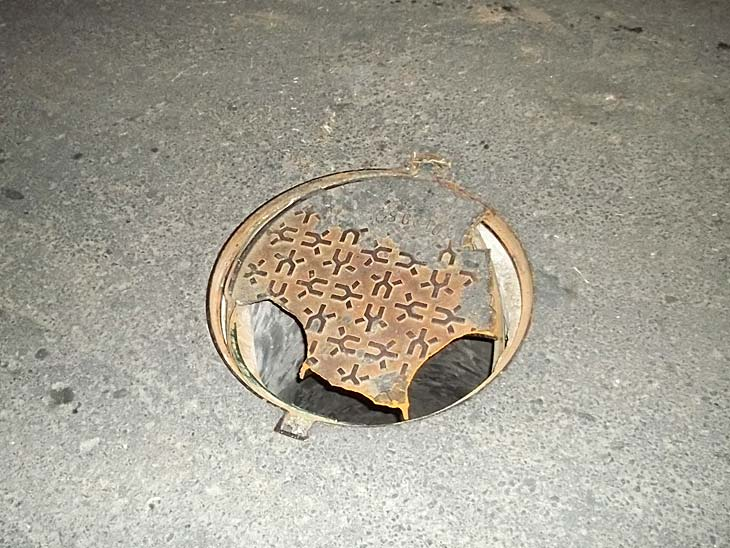

Box: [103511, 111325, 306809, 331604], Confidence: 0.93


In [41]:
run_inference('../training/images/18-bueiro_original.jpg')

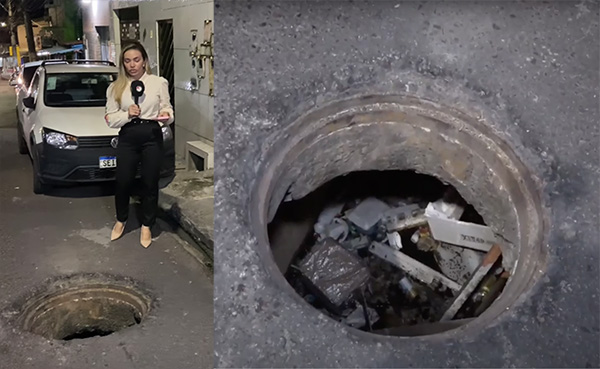

Box: [178451, 95007, 374131, 377473], Confidence: 0.94
Box: [5723, 312701, 106490, 381508], Confidence: 0.85


In [42]:
run_inference('../training/images/foto-bueiro.jpg')

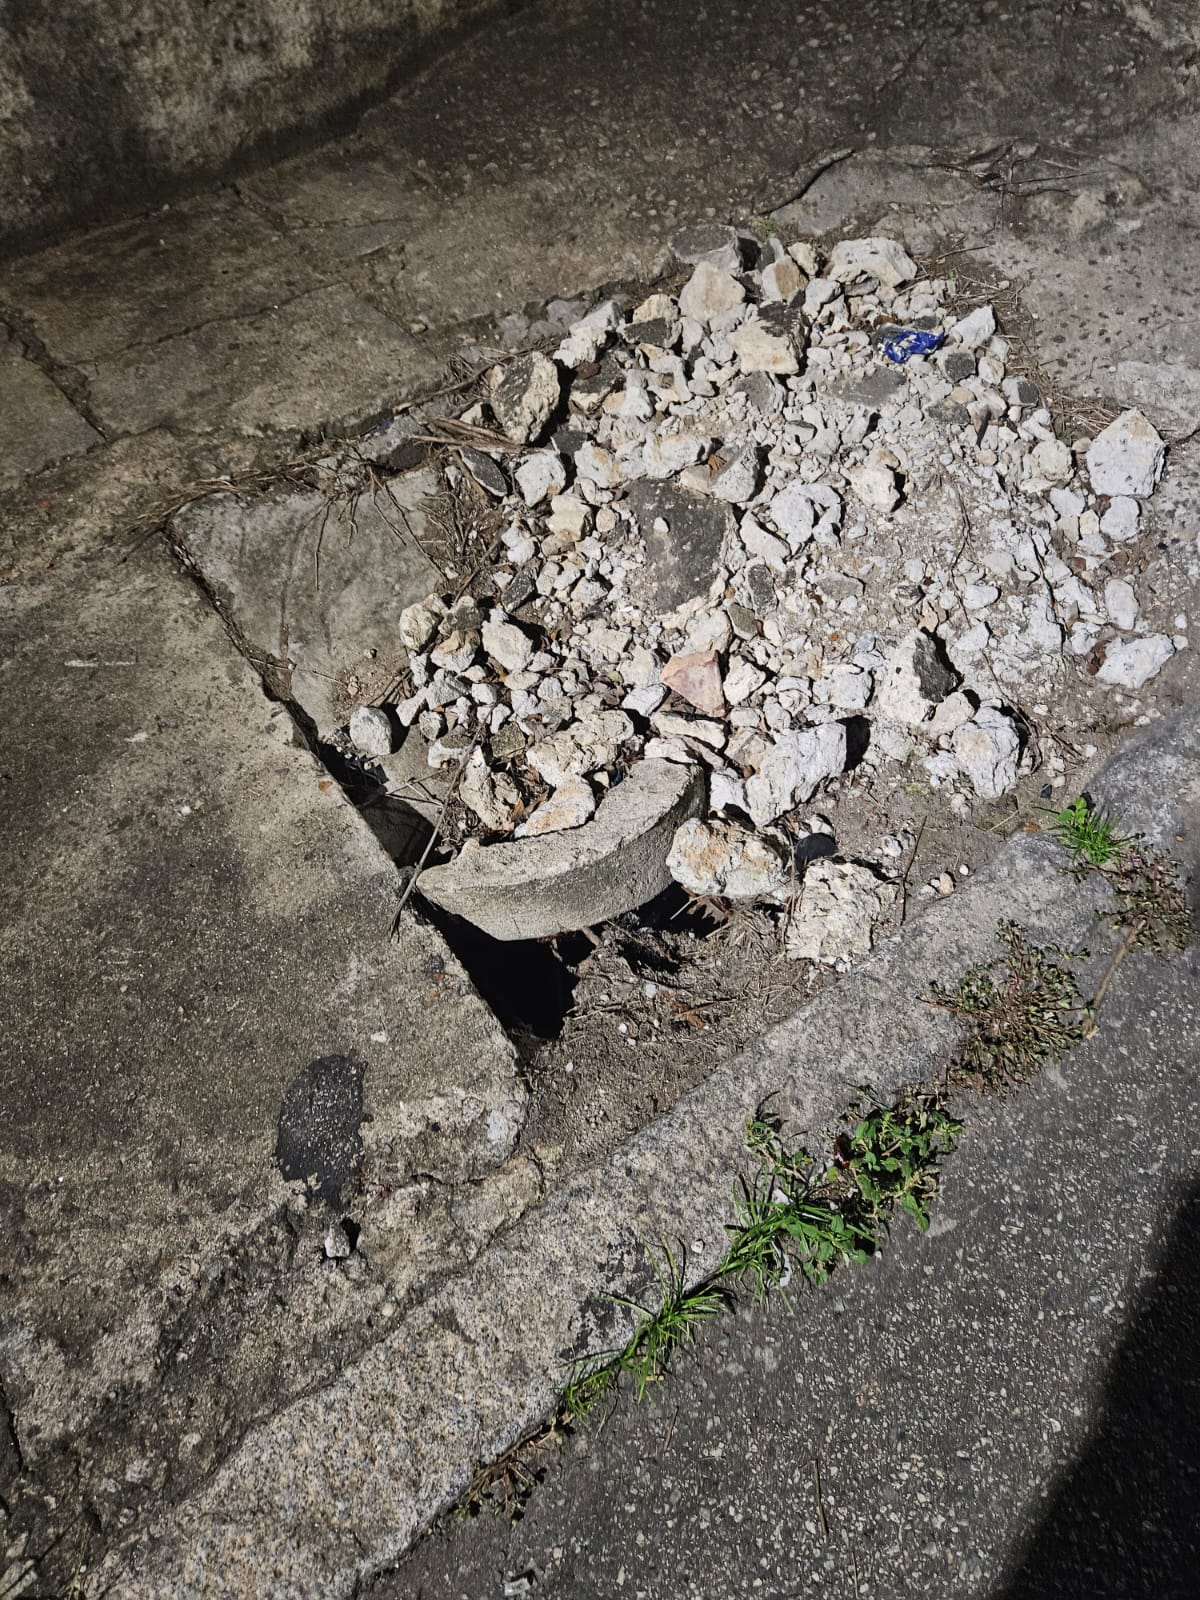

In [43]:
run_inference('../training/images/minha-rua.jpeg')